<a href="https://colab.research.google.com/github/raghavendramanandi/AINoteBook/blob/master/CapitalLetterClasificationN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# https://keras.io/
!pip install -q keras
!pip install mlxtend  
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from google.colab import files

from keras.datasets import mnist

In [72]:
!pwd
!cd sample_data
!pwd
!ls -ltr
# # !rm *

# files.upload()
# files.upload()
# files.upload()
# files.upload()

!pwd
!ls -ltr


/content
/content
total 111640
drwxr-xr-x 2 root root     4096 Nov 20 18:17 sample_data
-rw-r--r-- 1 root root    20808 Nov 25 08:38 emnist-letters-test-labels-idx1-ubyte
-rw-r--r-- 1 root root   124808 Nov 25 08:38 emnist-letters-train-labels-idx1-ubyte
-rw-r--r-- 1 root root 16307216 Nov 25 08:44 emnist-letters-test-images-idx3-ubyte
-rw-r--r-- 1 root root 97843216 Nov 25 10:51 emnist-letters-train-images-idx3-ubyte
/content
total 111640
drwxr-xr-x 2 root root     4096 Nov 20 18:17 sample_data
-rw-r--r-- 1 root root    20808 Nov 25 08:38 emnist-letters-test-labels-idx1-ubyte
-rw-r--r-- 1 root root   124808 Nov 25 08:38 emnist-letters-train-labels-idx1-ubyte
-rw-r--r-- 1 root root 16307216 Nov 25 08:44 emnist-letters-test-images-idx3-ubyte
-rw-r--r-- 1 root root 97843216 Nov 25 10:51 emnist-letters-train-images-idx3-ubyte


In [0]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

from mlxtend.data import loadlocal_mnist

X_train, y_train = loadlocal_mnist(
        images_path='/content/emnist-letters-train-images-idx3-ubyte', 
        labels_path='/content/emnist-letters-train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(
        images_path='/content/emnist-letters-test-images-idx3-ubyte', 
        labels_path='/content/emnist-letters-test-labels-idx1-ubyte')

(124800, 784)
(20800, 784)
(124800,)


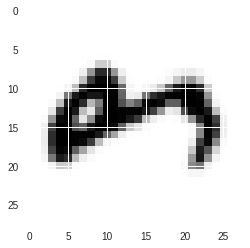

In [74]:
print (X_train.shape)
print (X_test.shape)

print (y_train.shape)

X_train = X_train.reshape(124800, 28, 28)
X_test = X_test.reshape(20800, 28, 28)

from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[5])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [77]:
y_train[:10]

array([23,  7, 16, 15, 23, 17, 13, 11, 22, 24], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 26-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 27)
Y_test = np_utils.to_categorical(y_test, 27)

In [79]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [85]:
from keras.layers import Activation
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(26,26,1)))
model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(12,12,1)))
model.add(Dropout(0.2))
# model.add(BatchNormalization())
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(10,10,1)))
model.add(Convolution2D(27, 1, activation='relu'))
model.add(Convolution2D(27, 8))
model.add(Flatten())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(26, 26, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(12, 12, 1...)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(10, 10, 1...)`
  


In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 10, 10, 16)        2320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 8)           1160      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [88]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=25, nb_epoch=15, verbose=1)

score = model.evaluate(X_test, Y_test, verbose=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/15
124800/124800 [==============================] - 58s 469us/step - loss: 0.5122 - acc: 0.8426
Epoch 2/15
124800/124800 [==============================] - 55s 438us/step - loss: 0.2990 - acc: 0.9037
Epoch 3/15
124800/124800 [==============================] - 54s 436us/step - loss: 0.2565 - acc: 0.9162
Epoch 4/15
124800/124800 [==============================] - 55s 437us/step - loss: 0.2333 - acc: 0.9229
Epoch 5/15
124800/124800 [==============================] - 54s 436us/step - loss: 0.2177 - acc: 0.9276
Epoch 6/15
124800/124800 [==============================] - 54s 436us/step - loss: 0.2069 - acc: 0.9301
Epoch 7/15
124800/124800 [==============================] - 55s 437us/step - loss: 0.1982 - acc: 0.9330
Epoch 8/15
124800/124800 [==============================] - 54s 436us/step - loss: 0.1912 - acc: 0.9345
Epoch 9/15
124800/124800 [==============================] - 54s 436us/step - loss: 0.1873 - acc: 0.9356
Epoch 10/15
124800/124800 [==============================] - 54s

In [89]:
print(score)

print(y_pred[:9])
print(y_test[:9])

layer_dict = dict([(layer.name, layer) for layer in model.layers])

[0.20893452289012762, 0.9345673076923077]


NameError: ignored

In [90]:
model.save("CapitalLetterClasificationN1-1.h5")

!ls

CapitalLetterClasificationN1-1.h5      emnist-letters-train-images-idx3-ubyte
emnist-letters-test-images-idx3-ubyte  emnist-letters-train-labels-idx1-ubyte
emnist-letters-test-labels-idx1-ubyte  sample_data
